    X     Y
0   1   1.5
1   2  13.7
2   3   3.2
3   4   5.0
4   5   4.1
5   6   7.0
6   7   5.6
7   8  13.0
8   9  11.0
9  10   9.0

No of samples : 10
No of features(dimensions) : 2


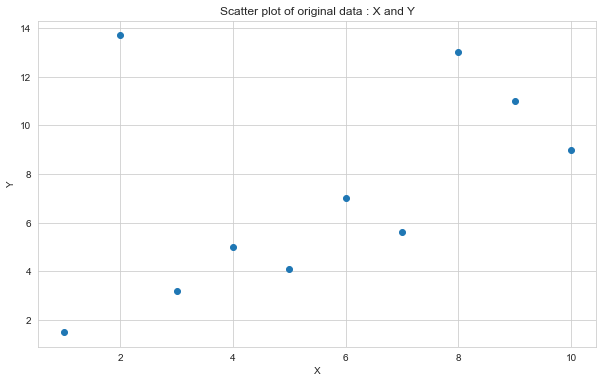

    X     Y
0   1   1.5
1   2  13.7
2   3   3.2
3   4   5.0
4   5   4.1
5   6   7.0
6   7   5.6
7   8  13.0
8   9  11.0
9  10   9.0

No of samples : 10
No of features(dimensions) : 2


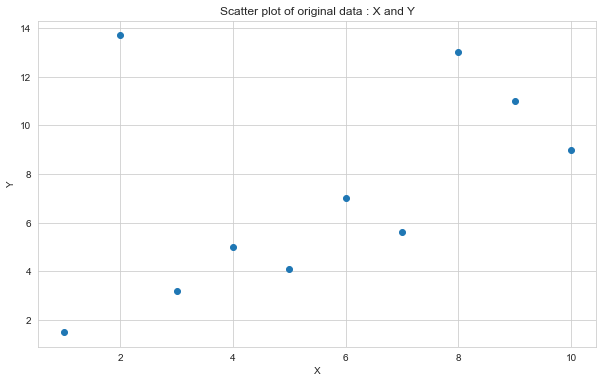

AttributeError: 'DataFrame' object has no attribute 'cols'

In [10]:
# Import Modules

import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from scipy.spatial.distance import pdist, squareform
%run datasets.py

# Import data from file

og_data = sample1()
cols = sample1().cols

# ----- Scale Data (Min-Max) -----

scaler = MinMaxScaler(feature_range=(-1, 1))
x = pd.DataFrame(scaler.fit_transform(og_data))
x.columns = cols

# Set the figure size
plt.figure(figsize=(10, 6))
# Create a scatter plot
sns.scatterplot(x=x['X'], y=x['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter plot scaled data : X and Y')
plt.show()


## ----------- MEDIAN ABSOLUTE DEVIATION (MAD) correlation matrix ---------------

def compute_median_absolute_deviation(df):
    return df.apply(lambda col: np.absolute(col - col.median()))

def generate_corr_elems(columns):
    comb = permutations(columns, 2)
    perms = list(comb)
    diag = [(col, col) for col in columns]
    return diag + perms

def compute_corr_matrix_values(df, corr_elems):
    corr_values = []
    for elem in corr_elems:
        corr_values.append(df[elem[0]].append(df[elem[1]], ignore_index=True).median(axis=0))
    return corr_values

def construct_corr_matrix(corr_values, num_columns):
    matrix = np.diag(corr_values[:num_columns])
    k = 0
    for i in range(num_columns):
        for j in range(num_columns):
            if i != j:
                matrix[i, j] = corr_values[num_columns:][k]
                k += 1
    return matrix

# Compute the Median Absolute Deviation
x_MAD = compute_median_absolute_deviation(x)
print(f'\n ---> Median Absolute Deviation : \n\n{x_MAD}')

# Generate the correlation matrix elements
corr_elems = generate_corr_elems(x_MAD.columns)
print(f'\n ---> The elements of the corr matrix are : \n\n{corr_elems}')

# Compute the correlation matrix values
corr_values = compute_corr_matrix_values(x_MAD, corr_elems)
print(f'\n ---> The values of the corr_elems are : \n')
for i, value in zip(corr_elems, corr_values):
    print(f'*The median of the columns ({i[0]},{i[1]}) -> {value}')

# Construct the correlation matrix
corr_matrix = construct_corr_matrix(corr_values, x_MAD.shape[1])
print(f'\n ---> Correlation matrix : \n\n{corr_matrix}')

# Eigen Value & Eigen Vector Decomposition

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Print the sorted eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

eig_vals_total = sum(eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
print('\nExplained variance             : {}'.format(explained_variance))

print('Cumulative explained variance  : {}'.format(cum_explained_variance))

# Data Transformation.

# Select 'k' no of eigen vectors
k = 1
W = eigenvectors[:k, :] # Projection matrix

# Transform the original dataset
X_proj = x.dot(W.T)

print(f'Shape of projection : {W.shape}')
print('\nNew projection:')
print(X_proj)

# Calculate the end points of the PC axes (scaled by the square root of the absolute eigenvalues)
pc_endpoints = eigenvectors * np.sqrt(np.abs(eigenvalues))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the original standardized data points
sns.scatterplot(x=x['X'], y=x['Y'], label='scaled Data', color='grey')

# Plot the transformed data points
transformed_y = [0] * len(X_proj)
sns.scatterplot(x=X_proj[0], y=transformed_y, label='Transformed Data', color='orange', alpha=0.5)

# Plot the PC axes on the original standardized data
origin = x.median(axis=0)
arrow_scale = 2
arrow_width = 0.004
plt.quiver(*origin, *pc_endpoints[:, 0], label='PC1', color='red', scale=arrow_scale, width=arrow_width)
plt.quiver(*origin, *pc_endpoints[:, 1], label='PC2', color='green', scale=arrow_scale, width=arrow_width)

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot of Original and Transformed Data with Principal Component Axes')
plt.grid(True)
plt.axis('equal')
plt.show()


In [2]:
def sample5():

    """ A fucking donuct thats supposed to be a shuriken """

    np.random.seed(42)

    n_samples = 100
    n_blades = 4

    theta = np.linspace(0, 2 * np.pi, n_samples)
    r_noise = 0.15 * np.random.randn(n_samples)
    r = 1 + r_noise

    x = np.array([])
    y = np.array([])

    for blade in range(n_blades):
        blade_theta = theta + blade * np.pi / n_blades
        blade_x = r * np.cos(blade_theta)
        blade_y = r * np.sin(blade_theta)

        # Make one blade unevenly longer
        if blade == 0:
            blade_x *= 1 + (0.5 * np.random.rand(n_samples))
            blade_y *= 1 + (0.5 * np.random.rand(n_samples))

        x = np.concatenate((x, blade_x))
        y = np.concatenate((y, blade_y))

    # Combine x and y as a dataset
    shuriken_data = np.column_stack((x, y))
    og_data = pd.DataFrame({'X': shuriken_data[:, 0], 'Y': shuriken_data[:, 1]})
    s_row, s_col = og_data.shape
    cols = list(og_data.columns)

    # Print the DataFrame
    print(og_data)
    print(f'\nNo of samples : {s_row}\nNo of features(dimensions) : {s_col}')

    # Set up Seaborn plotting style
    sns.set_style("whitegrid")

    # Plot the dataset using Seaborn
    sns.scatterplot(x=shuriken_data[:, 0], y=shuriken_data[:, 1])

    plt.axis("equal")
    plt.title("Uneven Shuriken-Shaped Dataset")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return og_data
    return s_row
    return s_col
    return cols

            X         Y
0    1.298763  0.000000
1    1.085821  0.077718
2    1.153553  0.178955
3    1.409880  0.289738
4    1.374267  0.265983
..        ...       ...
395 -0.395586  0.672792
396 -0.585404  0.864934
397 -0.635865  0.821904
398 -0.661343  0.751106
399 -0.682225  0.682225

[400 rows x 2 columns]

No of samples : 400
No of features(dimensions) : 2


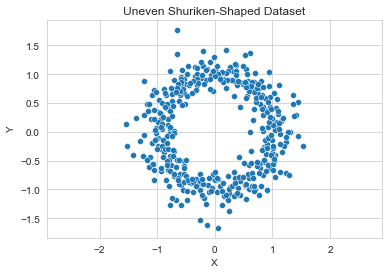

,X,Y
0,1.298763,0.000000
1,1.085821,0.077718
2,1.153553,0.178955
3,1.409880,0.289738
4,1.374267,0.265983
...,...,...
395,-0.395586,0.672792
396,-0.585404,0.864934
397,-0.635865,0.821904
398,-0.661343,0.751106


In [3]:
sample5()